In [10]:
%matplotlib inline

from __future__ import division
import numpy as np
import glob
from astropy import units as u
from astropy.coordinates import SkyCoord
#import healpy as hp
import matplotlib.pyplot as plt
import plot2
#import ephem
from matplotlib.ticker import Formatter, FixedFormatter, FixedLocator
from matplotlib import text

#from enterprise.pulsar import Pulsar

#from jupyterthemes import jtplot
#jtplot.style('chesterish')

#%config InlineBackend.figure_format = 'retina'

In [11]:
# # determine pulsar locations 
# datadir ='/Users/kpislo/Research/NANOGrav/nanograv_data/11yr/partim'
# parfiles = sorted(glob.glob(datadir + '/*.par'))
# timfiles = sorted(glob.glob(datadir + '/*.tim'))

# psrs = []
# for p, t in zip(parfiles, timfiles):
#     psrs.append(Pulsar(p, t))

# filename = '/Users/kpislo/Research/NANOGrav/nanograv_data/11yr/psr_pos.txt'

# with open(filename,'w') as f:
#     for p in psrs:
#         f.write('{0} {1} {2}\n'.format(p.name, p._raj, p._decj))
# f.close()	

# import data files (sessions A-F for timing observations are below)

psr_positions_a = np.loadtxt('/Users/Zach/Desktop/nanograv_plots/a_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_b = np.loadtxt('/Users/Zach/Desktop/nanograv_plots/b_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_c = np.loadtxt('/Users/Zach/Desktop/nanograv_plots/c_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_d = np.loadtxt('/Users/Zach/Desktop/nanograv_plots/d_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_e = np.loadtxt('/Users/Zach/Desktop/nanograv_plots/e_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_fa = np.loadtxt('/Users/Zach/Desktop/nanograv_plots/f_a_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_fb = np.loadtxt('/Users/Zach/Desktop/nanograv_plots/f_b_sess_nano_sources_12-2017.txt', usecols=(0,1))
c_a = SkyCoord(ra=psr_positions_a[:,0]*u.degree, dec=psr_positions_a[:,1]*u.degree, frame='icrs')
c_b = SkyCoord(ra=psr_positions_b[:,0]*u.degree, dec=psr_positions_b[:,1]*u.degree, frame='icrs')
c_c = SkyCoord(ra=psr_positions_c[:,0]*u.degree, dec=psr_positions_c[:,1]*u.degree, frame='icrs')
c_d = SkyCoord(ra=psr_positions_d[:,0]*u.degree, dec=psr_positions_d[:,1]*u.degree, frame='icrs')
c_e = SkyCoord(ra=psr_positions_e[:,0]*u.degree, dec=psr_positions_e[:,1]*u.degree, frame='icrs')
c_fa = SkyCoord(ra=psr_positions_fa[0]*u.degree, dec=psr_positions_fa[1]*u.degree, frame='icrs')
c_fb = SkyCoord(ra=psr_positions_fb[0]*u.degree, dec=psr_positions_fb[1]*u.degree, frame='icrs')
print c_a.ra.radian, c_a.dec.radian
print c_b.ra.radian, c_b.dec.radian
print c_c.ra.radian, c_c.dec.radian
print c_d.ra.radian, c_d.dec.radian
print c_e.ra.radian, c_e.dec.radian
print c_fa.ra.radian, c_fa.dec.radian
print c_fb.ra.radian, c_fb.dec.radian


[ 3.90796673  4.19210633  4.25197112  4.37972922  4.51167612  4.64449567
  4.4755478   4.53523806  4.58306008] [-0.58451077 -0.53860861 -0.39322268 -0.21642083  0.13648475 -0.20193459
 -0.33265976 -0.25516714 -0.40352012]
[ 4.65880737  5.0167744   5.28206445  5.69815094] [-0.70895274 -0.65921086 -0.23422319 -0.13665928]
[ 2.01568075  2.99271607  1.72909769  1.7673204   2.67419348] [ 1.15767689  1.36694187  0.89011792  0.88994339  0.92729343]
[ 6.03360322  0.96220002  1.63066112  2.49093391  2.72533163  1.61477862
  1.59121668  2.67070282] [ 0.78033671  0.72466071 -0.03490659 -0.33196162 -0.12793263 -0.36599554
  0.64594636 -0.74368479]
[ 4.32265696  5.14732503  4.67468987  4.72181376  4.762829    4.90350253
  4.85323705  5.05569524  5.60495036] [ 0.6551966   0.37646752 -0.50597095 -0.37332593 -0.42027528 -0.19530234
 -0.15009832 -0.11728613 -0.59323741]
4.51167611641 0.136484747506
5.01677440193 -0.659210858478


In [12]:
# load skymap
#h_upper = np.load('/home/jacob/Downloads/skymap_update_again_2.npy')

In [13]:
# # Initialize a low-resolution HEALPix array
# nside = 4

# # Get sky locations of pixels
# idx = hp.pix2ang(nside, np.arange(0,len(h_upper)))
# #
# # set to angles of CW sources
# theta_h = idx[0]
# phi_h = idx[1]

# # CW search is parameterized in direction of GW propogation
# # Switch from source to origin via a parity transformation
# phi_h = np.pi + phi_h
# theta_h = np.pi - theta_h

# flipid = hp.ang2pix(nside, theta_h, phi_h)

In [14]:
# plotting function stolen from bayestar; modified so axes are sent back 

def outline_text(ax):
    """If we are using a new enough version of matplotlib, then
    add a white outline to all text to make it stand out from the background."""
    try:
        # Try to import matplotlib.patheffects (requires matplotlib 1.0+).
        from matplotlib import patheffects
    except ImportError:
        # If import failed, print a warning and do nothing.
        warnings.warn("This version of matplotlib does not support path effects.")
    else:
        # Otherwise, add the path effects.
        effects = [patheffects.withStroke(linewidth=2, foreground='w', zorder=2)]
        for artist in ax.findobj(text.Text):
            artist.set_path_effects(effects)
            

            

In [15]:
# plotting parameters to gussy things up a li'l

def figsize(scale):
    fig_width_pt = 513.17 #469.755    # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27         # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0    # Aesthetic ratio
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width * golden_mean              # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size
            

plt.rcParams.update(plt.rcParamsDefault)
params = {'backend': 'pdf',
    'axes.labelsize': 10,
        'lines.markersize': 4,
        'font.size': 10,
        'xtick.major.size':6,
        'xtick.minor.size':3,
        'ytick.major.size':6,
        'ytick.minor.size':3,
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        #'savefig.dpi':200,
        #'path.simplify':True,
        #'font.family': 'serif',
        #'font.serif':'Times',
        #'text.latex.preamble': [r'\usepackage{amsmath}'],
        #'text.usetex':True,
        'figure.figsize': figsize(1)}

#plt.rcParams.update(params)

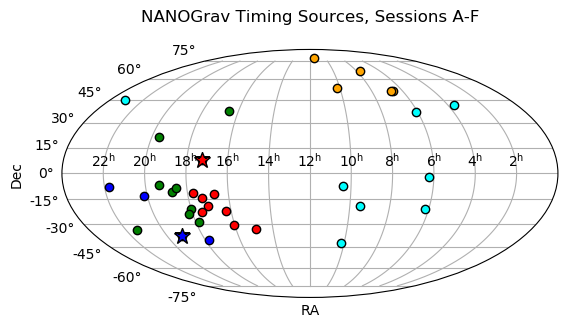

In [16]:
# create projection
ax = plt.subplot(111, projection='astro mollweide')
ax.grid()

# this makes text easier to see on dark colors 
#plot2.outline_text(ax)

# flip map
#h_upper_f = h_upper[flipid]

# plot map
#h_upper_smoothed = hp.smoothing(h_upper_f, 0.5)
#h_upper_smoothed = hp.smoothing(h_upper, 0.5)
#plot.healpix_heatmap(h_upper_smoothed)

#add labels
ax.set_xlabel("RA")
ax.set_ylabel("Dec")


# add pulsars
ax.plot(c_a.ra.radian,c_a.dec.radian, 
        '.', color='red', markersize=12, mec='k')
ax.plot(c_b.ra.radian,c_b.dec.radian, 
        '.', color='blue', markersize=12, mec='k')
ax.plot(c_c.ra.radian,c_c.dec.radian, 
        '.', color='orange', markersize=12, mec='k')
ax.plot(c_d.ra.radian,c_d.dec.radian, 
        '.', color='cyan', markersize=12, mec='k')
ax.plot(c_e.ra.radian,c_e.dec.radian, 
        '.', color='green', markersize=12, mec='k')
ax.plot(c_fa.ra.radian,c_fa.dec.radian, 
        '*', color='red', markersize=12, mec='k')
ax.plot(c_fb.ra.radian,c_fb.dec.radian, 
        '*', color='blue', markersize=12, mec='k')
#use zorder=1 to display points underneath grid lines

plt.title('NANOGrav Timing Sources, Sessions A-F', y=1.08)   #As of 12/2017
#plt.suptitle(r'95\% Characteristic Strain Upper Limit, $h_{95}$', y=0.05)
#plt.colorbar(orientation='horizontal', shrink=0.5)
plt.show()

#plt.savefig('/Users/Zach/Desktop/nanograv_plots/nano_sessions_projection_12-2017.png')